/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 894, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


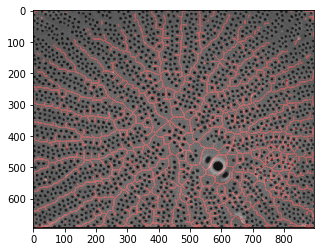

In [49]:
#ADAPTIVE SKELETON WITH 3 COLORS SEEMS TO WORK BEST

import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild016.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.3) 

In [2]:
from PIL import Image
im=Image.open('cropped_Wild016.tif')
width, height=im.size

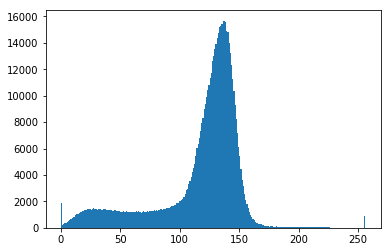

116.31244048022572

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild016.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

np.mean(img)


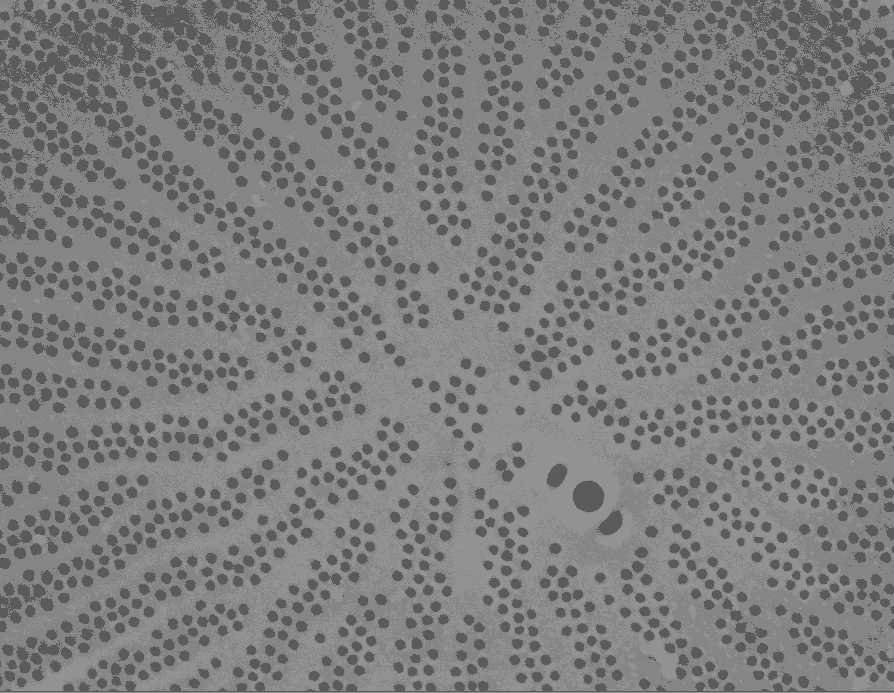

In [8]:
im.quantize(3,0)

<PIL.Image.Image image mode=P size=894x693 at 0x1C266AFD30>


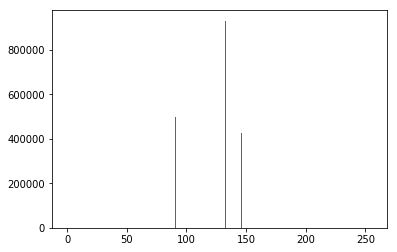

[[[133 133 133]
  [133 133 133]
  [133 133 133]
  ...
  [146 146 146]
  [146 146 146]
  [146 146 146]]

 [[133 133 133]
  [133 133 133]
  [133 133 133]
  ...
  [146 146 146]
  [146 146 146]
  [146 146 146]]

 [[133 133 133]
  [133 133 133]
  [133 133 133]
  ...
  [146 146 146]
  [146 146 146]
  [146 146 146]]

 ...

 [[133 133 133]
  [133 133 133]
  [133 133 133]
  ...
  [133 133 133]
  [133 133 133]
  [133 133 133]]

 [[ 91  91  91]
  [ 91  91  91]
  [ 91  91  91]
  ...
  [ 91  91  91]
  [ 91  91  91]
  [ 91  91  91]]

 [[146 146 146]
  [146 146 146]
  [146 146 146]
  ...
  [146 146 146]
  [146 146 146]
  [146 146 146]]]


In [37]:
image=im.quantize(3,0)
image.save('simple_Wild016.tif')
print(image)
newimg = cv2.imread('simple_Wild016.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
print(newimg)

newnewimg=newimg[:,:,0]

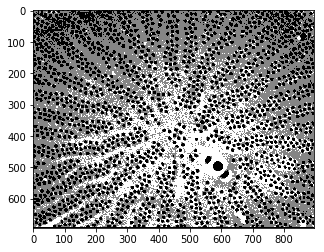

In [50]:
maximum= np.amax(newimg)
minimum=np.amin(newimg)

newimg[np.where(newimg == [maximum])] = [255]
newimg[np.where(newimg == [minimum])] = [0]
plt.imshow(newimg, cmap='gray')
newnewimg=newimg[:,:,0]

In [34]:
ablur = cv2.blur(newnewimg,(32, 32))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,71,4) 

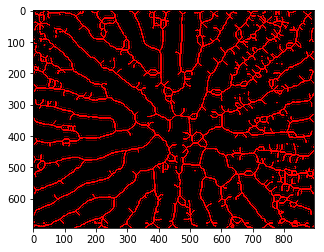

In [35]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

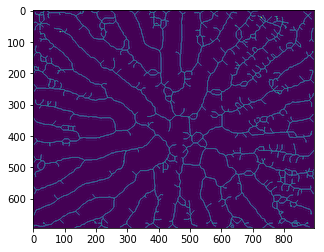

In [48]:
from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=50, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


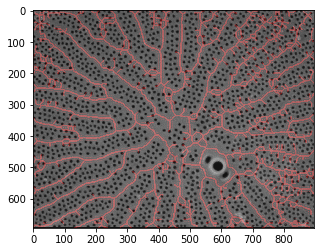

In [46]:
#CLEANED--ITS EASIER TO TELL THE DIFFERENCE WHEN YOU LOOK AT THE SKELETON BY ITSELF
img2=mpimg.imread('cropped_Wild016.tif')
imgplot2 = plt.imshow(img2, alpha= .9)

ax3 = plt.subplot()
ax3.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()